一、异常检测定义及应用领域
定义：发现与大部分对象不同的对象，其实就是发现离群点。异常检测有时也称偏差检测。异常对象是相对罕见的。
常见的异常检测的应用：
·欺诈检测：主要通过检测异常行为来检测是否为盗刷他人信用卡。
·入侵检测：检测入侵计算机系统的行为
·医疗领域：检测人的健康是否异常

二、常见的异常检测算法
基于模型的技术：许多异常检测技术首先建立一个数据模型，异常是那些同模型不能完美拟合的对象。例如，数据分布的模型可以通过估计概率分布的参数来创建。如果一个对象不服从该分布，则认为他是一个异常。
基于邻近度的技术：通常可以在对象之间定义邻近性度量，异常对象是那些远离大部分其他对象的对象。当数据能够以二维或者三维散布图呈现时，可以从视觉上检测出基于距离的离群点。
基于密度的技术：对象的密度估计可以相对直接计算，特别是当对象之间存在邻近性度量。低密度区域中的对象相对远离近邻，可能被看做为异常。


三、编程练习

1、ESD（generalized ESD test）
在现实数据集中，异常值往往是多个而非单个。为了将Grubbs’ Test扩展到k个异常值检测，则需要在数据集中逐步删除与均值偏离最大的值（为最大值或最小值），同步更新对应的t分布临界值，检验原假设是否成立。基于此，Rosner提出了Grubbs’ Test的泛化版ESD（Extreme Studentized Deviate test）。
算法流程如下：
1）计算与均值偏离最远的残差；
2）计算临界值；
3）检验原假设，比较检验统计量与临界值；若残差大于临界值，则原假设不成立，该样本点为异常点
4）重复以上步骤k次至算法结束。

Number of outliers:  3
Indices of outliers:  [53, 52, 51]
        R      Lambda
 1   3.14819   3.15879
 2   2.97114   3.15143
 3   3.21044   3.14389
 4   2.83814   3.13616
 5   2.84416   3.12825
 6   2.87769   3.12013
 7   2.30345   3.11180
 8   2.33534   3.10324
 9   2.12480   3.09446
10   2.09054   3.08542


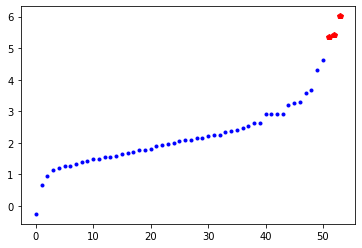

In [13]:
import numpy as np
import matplotlib.pylab as plt
from PyAstronomy import pyasl
# Convert data given at:
# http://www.itl.nist.gov/div898/handbook/eda/section3/eda35h3.htm
# to array.
x = np.array([float(x) for x in "-0.25 0.68 0.94 1.15 1.20 1.26 1.26 1.34 1.38 1.43 1.49 1.49 \
          1.55 1.56 1.58 1.65 1.69 1.70 1.76 1.77 1.81 1.91 1.94 1.96 \
          1.99 2.06 2.09 2.10 2.14 2.15 2.23 2.24 2.26 2.35 2.37 2.40 \
          2.47 2.54 2.62 2.64 2.90 2.92 2.92 2.93 3.21 3.26 3.30 3.59 \
          3.68 4.30 4.64 5.34 5.42 6.01".split()])
# Apply the generalized ESD
r = pyasl.generalizedESD(x, 10, 0.05, fullOutput=True)
print("Number of outliers: ", r[0])
print("Indices of outliers: ", r[1])
print("        R      Lambda")
for i in range(len(r[2])):
    print("%2d  %8.5f  %8.5f" % ((i + 1), r[2][i], r[3][i]))
# Plot the "data"
plt.plot(x, 'b.')
# and mark the outliers.
for i in range(r[0]):
    plt.plot(r[1][i], x[r[1][i]], 'rp')
plt.show()

2、STL (Seasonal-Trend decomposition procedure based on Loess) 
为时序分解中一种常见的算法，基于LOESS将某时刻的数据Yv分解为趋势分量（trend component）、季节性分量（seasonal component）和残差（remainder component）:
$Y_v=T_v+S_v+R_v\quad v=1,...,N$
由上到下依次为：原始时间序列和使用 STL 分解得到的季节变化部分、趋势变化部分以及残差部分。

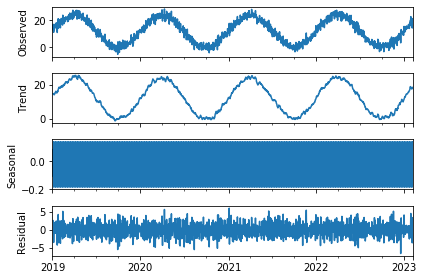

In [15]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
# Generate some data
np.random.seed(0)
n = 1500
dates = np.array('2019-01-01', dtype=np.datetime64) + np.arange(n)
data = 12 * np.sin(2 * np.pi * np.arange(n) / 365) + np.random.normal(12, 2, 1500)
df = pd.DataFrame({'data': data}, index=dates)
# Reproduce the example in OP
seasonal_decompose(df, model='additive').plot()
plt.show()